# Project 1- BikeShare Data Regression

The goal of this project is to predict the number of bikeshare rides for a given hour. Understanding hourly ridership trends can provide crucial insights for bike fleet management, station placement, and customer service strategies in urban environments. By developing models that accurately forecast bike demand at different times, you’ll contribute to more efficient operations and a better biking experience for users.

### Import Packages
Imports essential Python libraries and machine learning tools for data analysis, visualization, and model evaluation, as well as functions for splitting data into training and testing sets. These are typically used in machine learning projects to build and assess predictive models.

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import Data
Let's start by importing the training and testing data.

In [178]:
train = pd.read_csv('train.csv')
train.head()

,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,Average Trip Distance,Most Popular Pickup,Most Popular Dropoff,Percentage E-Bike Rides,Station Maintenance Calls,units,Rider Count
0,5ab8b269fd,1294444800,07/01/2011 19:00,Mist and broken clouds,0.5,51.0,11.0000,66.74,19.22,18,8.885630,Palmerston-Little Italy,Regent Park,16,2.0,"['C', 'kph', 'mi', 'F', 'F', 'T-5']",25
1,0eb353c11f,1294448400,07/01/2011 20:00,Mist,32.9,55.0,6.0000,19.30,-7.10,18,3.300000,South Parkdale,Yonge-Eglinton,7,3.3,"['F', 'kph', 'km', 'C', 'C', 'T-5']",16
2,1bdf337bd4,1294452000,07/01/2011 21:00,Mist,NaN,550.0,0.0000,66.74,-7.10,16,8.761356,Mount Pleasant West,South Parkdale,12,3.2,"['C', 'kph', 'mi', 'F', 'C', 'T-5']",16
3,5811602d38,1294455600,07/01/2011 22:00,Light Snow,0.5,55.0,11.0000,66.74,-7.10,7,4.225335,Cabbagetown-South St.James Town,Niagara,27,1.8,"['C', 'kph', 'mi', 'F', 'C', 'T-5']",7
4,729d82e3b1,1294459200,07/01/2011 23:00,Light Rain,32.9,55.0,6.8351,19.30,-7.10,22,8.388532,Little Portugal,Niagara,10,0.1,"['F', 'mph', 'mi', 'C', 'C', 'T-5']",1


In [180]:
train.shape

(11463, 17)

In [182]:
test = pd.read_csv('test.csv')
test.head()

,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,Average Trip Distance,Most Popular Pickup,Most Popular Dropoff,Percentage E-Bike Rides,Station Maintenance Calls,units
0,2dc4a8eddf,1293840000,31/12/2010 19:00,Sunny,37.94,81,0.0,61.52,0.5,12,14.000000,Palmerston-Little Italy,Palmerston-Little Italy,33,4.3,"['F', 'mph', 'km', 'F', 'C', 'T-5']"
1,413effe452,1293843600,31/12/2010 20:00,Broken clouds,2.30,80,0.0,16.40,32.9,24,3.293276,South Parkdale,Roncesvalles,17,4.8,"['C', 'kph', 'mi', 'C', 'F', 'T-5']"
2,23312f8c5e,1293847200,31/12/2010 21:00,Clear,36.14,80,0.0,61.52,32.9,20,3.790374,Playter Estates-Danforth,Yonge-Eglinton,16,0.8,"['F', 'kph', 'mi', 'F', 'F', 'T-5']"
3,55cc332d4c,1293850800,31/12/2010 22:00,Broken clouds,3.30,75,0.0,16.40,0.5,17,8.450669,Annex,Waterfront Communities-The Island,8,5.3,"['C', 'mph', 'mi', 'C', 'C', 'T-5']"
4,c1b709e002,1293854400,31/12/2010 23:00,Few clouds,37.94,75,0.0,16.40,0.5,8,0.621373,Niagara,Little Portugal,5,1.5,"['F', 'mph', 'mi', 'C', 'C', 'T-5']"


In [184]:
test.shape

(7411, 16)

In [186]:
train['datetimeUTC'] = pd.to_datetime(train['unix_time'], unit='s', utc=True)
test['datetimeUTC'] = pd.to_datetime(test['unix_time'], unit='s', utc=True)

In [188]:
train.isnull().sum()

unique_id                      0
unix_time                      0
Date/Time                      0
Weather                        0
Temperature                  546
Humidity                     543
Windspeed                    547
Weekly High Temperature        0
Weekly Low Temperature         0
Average Trip Duration          0
Average Trip Distance          0
Most Popular Pickup            0
Most Popular Dropoff           0
Percentage E-Bike Rides        0
Station Maintenance Calls      0
units                          0
Rider Count                    0
datetimeUTC                    0
dtype: int64

In [190]:
train.dropna(inplace=True)

In [192]:
test.isnull().sum()

unique_id                    0
unix_time                    0
Date/Time                    0
Weather                      0
Temperature                  0
Humidity                     0
Windspeed                    0
Weekly High Temperature      0
Weekly Low Temperature       0
Average Trip Duration        0
Average Trip Distance        0
Most Popular Pickup          0
Most Popular Dropoff         0
Percentage E-Bike Rides      0
Station Maintenance Calls    0
units                        0
datetimeUTC                  0
dtype: int64

In [194]:
train.describe()

,unix_time,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,Average Trip Distance,Percentage E-Bike Rides,Station Maintenance Calls,Rider Count
count,9.885000e+03,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000,9885.000000
mean,1.325743e+09,-19.528075,9.594234,-49.686879,52.954106,26.427640,14.995650,8.144822,18.476480,2.379454,198.162873
std,1.808265e+07,398.800742,366.295194,387.491908,28.395043,22.931437,5.748883,4.416169,9.511435,1.799324,187.260088
min,1.294445e+09,-9990.000000,-9990.000000,-9990.000000,12.700000,-7.100000,5.000000,0.000000,2.000000,0.000000,1.000000
25%,1.310544e+09,13.600000,45.000000,5.592355,26.800000,6.100000,10.000000,4.970982,10.000000,1.000000,43.000000
50%,1.326114e+09,29.600000,61.000000,9.000000,39.000000,21.100000,15.000000,7.642885,18.000000,2.000000,150.000000
75%,1.342033e+09,59.900000,78.000000,14.912946,80.240000,42.980000,20.000000,10.900000,27.000000,3.400000,294.000000
max,1.356736e+09,903.200000,940.000000,350.000000,102.200000,71.780000,25.000000,27.600000,35.000000,11.200000,977.000000


You'll notice that `train.csv` has about 60% of the data and has 16 columns, while `test.csv` has 40% of the data and 17 column. The extra column in `train.csv` is the training label `Rider Count`. 

In [197]:
# converting the temperature to degree celsius in the column units to make the data uniform
def f_to_c(fahrenheit):
    return (fahrenheit - 32) * 5.0 / 9.0

for i, row in train.iterrows():
    # the temperature unit in Celsius is converted to Farenheit 
    if row['units'][0] == 'F':
        train.at[i, 'Temperature'] = f_to_c(row['Temperature'])
        train.at[i, 'units'] = 'C'

In [199]:
# converting the temperature to degree celsius in the column units to make the data uniform
def f_to_c(fahrenheit):
    return (fahrenheit - 32) * 5.0 / 9.0

for i, row in test.iterrows():
    # the temperature unit in Celsius is converted to Farenheit 
    if row['units'][0] == 'F':
        test.at[i, 'Temperature'] = f_to_c(row['Temperature'])
        test.at[i, 'units'] = 'C'

In [201]:
# converting all units on the column windspeed to mile/hr
def kph_to_mph(kph):
    return kph * 0.621371

# since speed is in kph, convert to mph
    if row['units'][1] == 'kph':
        train.at[i, 'Windspeed'] = kph_to_mph(row['Windspeed'])

In [203]:
# converting all units on the column windspeed to mile/hr
def kph_to_mph(kph):
    return kph * 0.621371

# since speed is in kph, convert to mph
    if row['units'][1] == 'kph':
        test.at[i, 'Windspeed'] = kph_to_mph(row['Windspeed'])

In [205]:
# converting all units on the column average trip distance to mile
def km_to_mi(km):
    return km * 0.621371

for i, row in train.iterrows():
# since distance is in km, convert to mile
    if row['units'][2] == 'km':
        train.at[i, 'Average Trip Distance'] = km_to_mi(row['Average Trip Distance'])

In [207]:
# converting all units on the column average trip distance to mile
def km_to_mi(km):
    return km * 0.621371

for i, row in test.iterrows():
# since distance is in km, convert to mile
    if row['units'][2] == 'km':
        test.at[i, 'Average Trip Distance'] = km_to_mi(row['Average Trip Distance'])

## Exploratory Data Analysis
Next, let's explore the dataset. One thing to investigate what the distribution of our data is over time, given that the data is hourly ride counts.

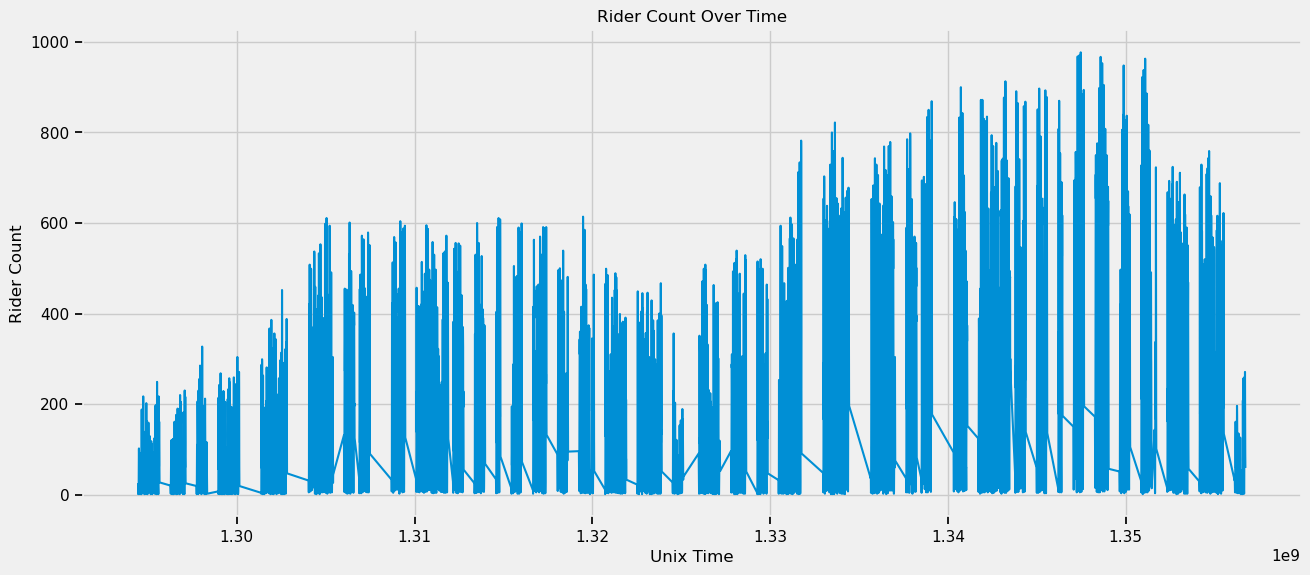

In [210]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=train, x='unix_time', y='Rider Count')
plt.xlabel('Unix Time')
plt.ylabel('Rider Count')
plt.title('Rider Count Over Time')
plt.show()

We can see that the testing data has been split out in chunks, and there are some trends over time...

In [213]:
# creating the columns week_end and time_difference

train['date']= pd.to_datetime(train['datetimeUTC'])
test['date']= pd.to_datetime(test['datetimeUTC'])

In [215]:
train['hour'] =train.date.dt.hour
train['day'] = train.date.dt.dayofweek
train['month'] = train.date.dt.month

In [217]:
test['hour'] =test.date.dt.hour
test['day'] = test.date.dt.dayofweek
test['month'] = test.date.dt.month

In [219]:
train['Week_end'] = train['date'].dt.weekday >=5

In [221]:
test['Week_end'] = test['date'].dt.weekday >=5

In [223]:
# Lets identify when it is morning, afternoon, evening and night
def time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

train['Time_difference'] = train['hour'].apply(time)
test['Time_difference'] = test['hour'].apply(time)

In [225]:
dataframe=pd.concat((train,test)).reset_index(drop=True)

In [227]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17296 entries, 0 to 17295
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   unique_id                  17296 non-null  object             
 1   unix_time                  17296 non-null  int64              
 2   Date/Time                  17296 non-null  object             
 3   Weather                    17296 non-null  object             
 4   Temperature                17296 non-null  float64            
 5   Humidity                   17296 non-null  float64            
 6   Windspeed                  17296 non-null  float64            
 7   Weekly High Temperature    17296 non-null  float64            
 8   Weekly Low Temperature     17296 non-null  float64            
 9   Average Trip Duration      17296 non-null  int64              
 10  Average Trip Distance      17296 non-null  float64            
 11  Mo

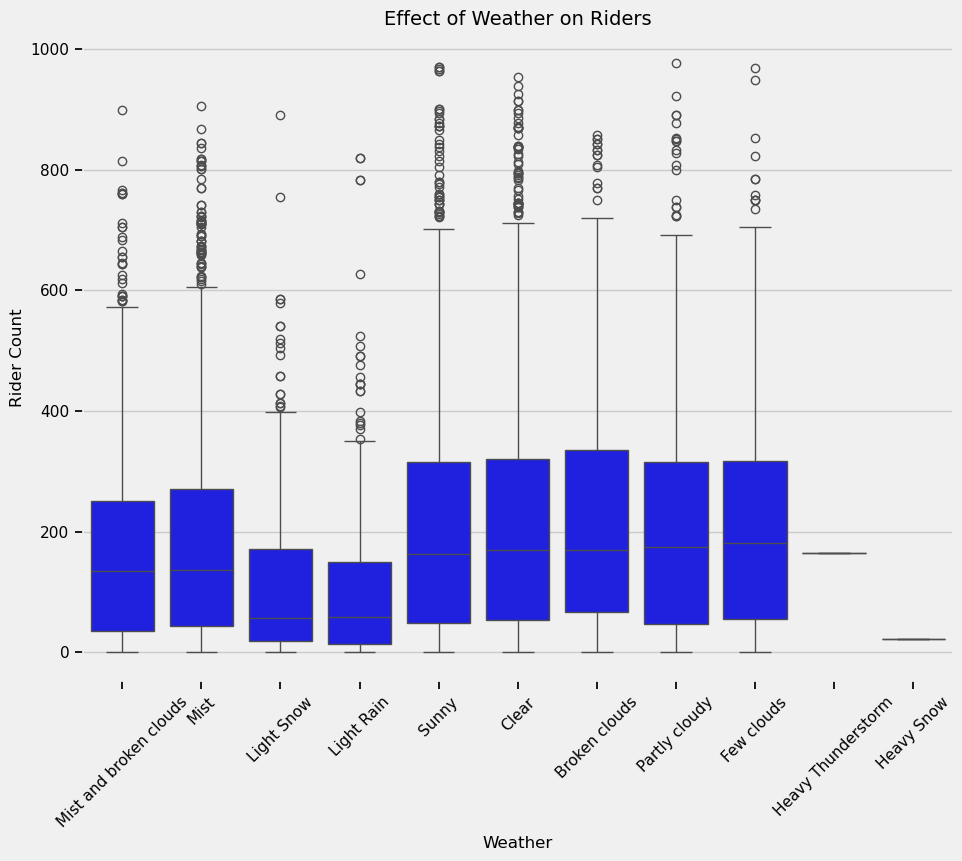

In [230]:
# the plot shows the effect of weather on the riders 

plt.figure(figsize=(10, 8))

sns.boxplot(x=dataframe['Weather'], y=dataframe['Rider Count'], color='blue')

plt.title('Effect of Weather on Riders', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Rider Count')
plt.xticks(rotation=45)

plt.show()

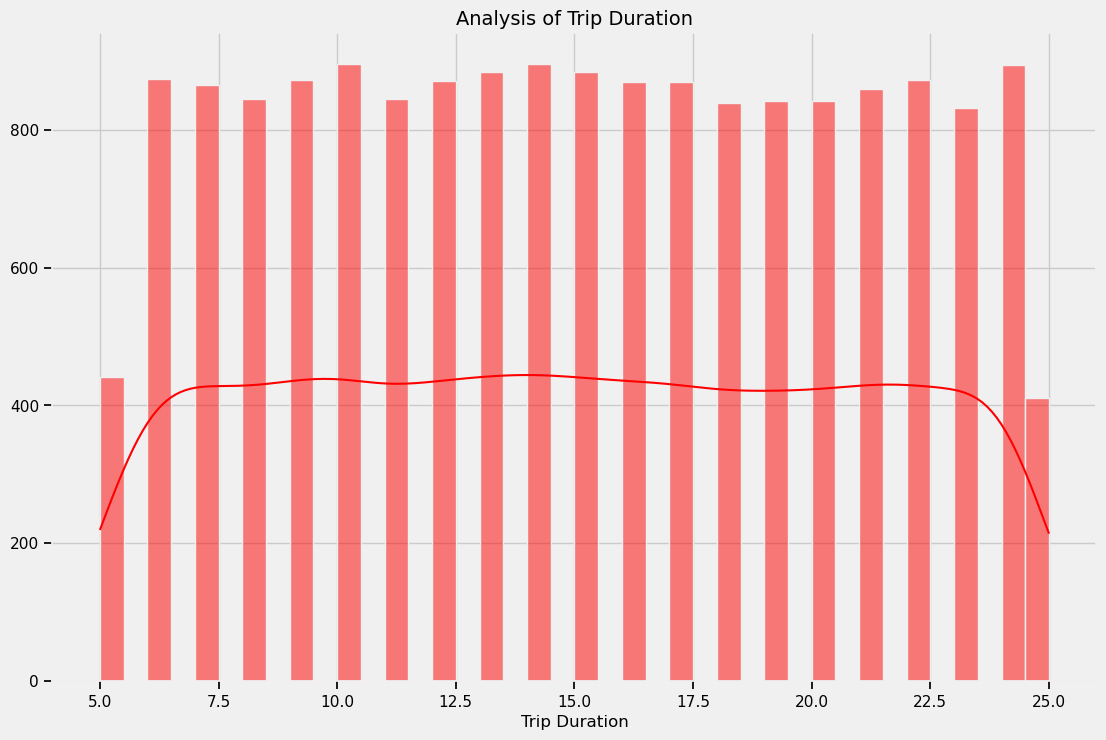

In [232]:
# the plot shows average trip duration which analyzes its impact on rider behaviour, identify patterns, and evaluate its correlation with factors like weather and rider count.

plt.figure(figsize=(12, 8))

sns.histplot(x=dataframe['Average Trip Duration'], bins=40, kde=True, color='red')

plt.title('Analysis of Trip Duration', fontsize=14)
plt.xlabel('Trip Duration')
plt.ylabel('')

plt.show()

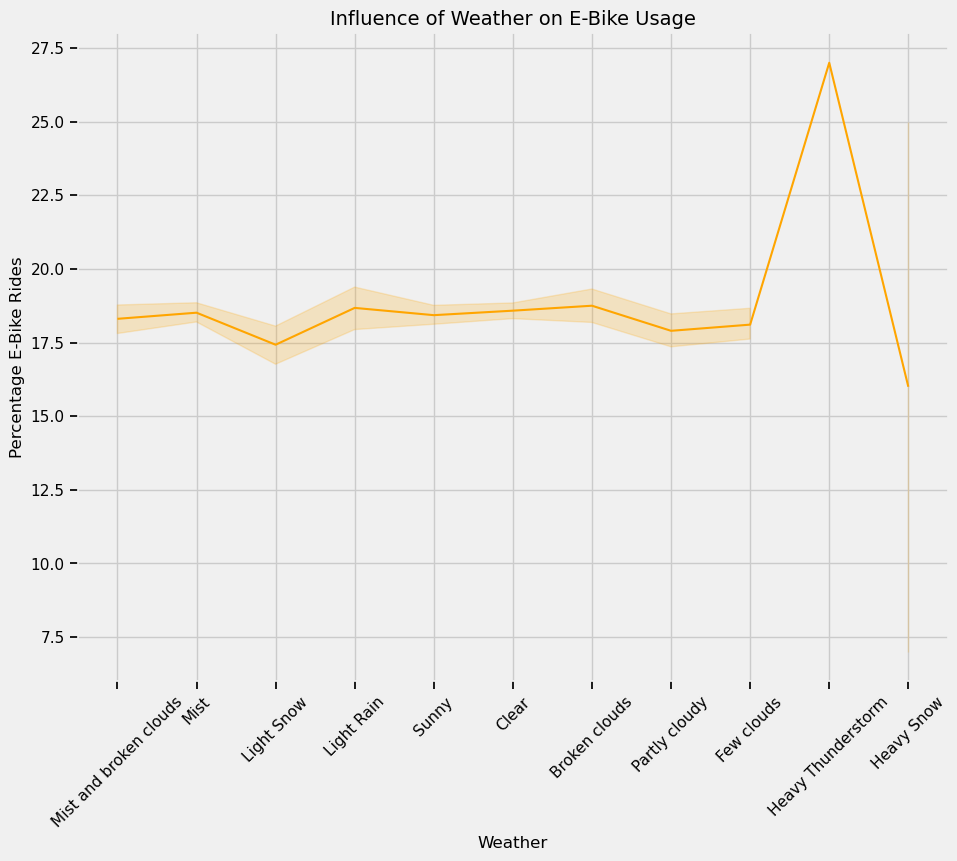

In [234]:
#The plot shows how weather conditions impact rider counts, helping us identify patterns, improve predictive models, and optimize planning during varying weather scenarios.

plt.figure(figsize=(10, 8))

sns.lineplot(x=dataframe['Weather'], y=dataframe['Percentage E-Bike Rides'], color='orange')

plt.title('Influence of Weather on E-Bike Usage', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Percentage E-Bike Rides')
plt.xticks(rotation=45)

plt.show()

In [235]:
# creating a new column for lagged ride count for 1 hour
dataframe['Lagged ride count'] = dataframe['Rider Count'].shift(1)
dataframe.head()

,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,...,units,Rider Count,datetimeUTC,date,hour,day,month,Week_end,Time_difference,Lagged ride count
0,5ab8b269fd,1294444800,07/01/2011 19:00,Mist and broken clouds,0.5,51.0,11.0000,66.74,19.22,18,...,"['C', 'kph', 'mi', 'F', 'F', 'T-5']",25.0,2011-01-08 00:00:00+00:00,2011-01-08 00:00:00+00:00,0,5,1,True,Night,NaN
1,0eb353c11f,1294448400,07/01/2011 20:00,Mist,32.9,55.0,6.0000,19.30,-7.10,18,...,"['F', 'kph', 'km', 'C', 'C', 'T-5']",16.0,2011-01-08 01:00:00+00:00,2011-01-08 01:00:00+00:00,1,5,1,True,Night,25.0
2,5811602d38,1294455600,07/01/2011 22:00,Light Snow,0.5,55.0,11.0000,66.74,-7.10,7,...,"['C', 'kph', 'mi', 'F', 'C', 'T-5']",7.0,2011-01-08 03:00:00+00:00,2011-01-08 03:00:00+00:00,3,5,1,True,Night,16.0
3,729d82e3b1,1294459200,07/01/2011 23:00,Light Rain,32.9,55.0,6.8351,19.30,-7.10,22,...,"['F', 'mph', 'mi', 'C', 'C', 'T-5']",1.0,2011-01-08 04:00:00+00:00,2011-01-08 04:00:00+00:00,4,5,1,True,Night,7.0
4,c7c27ecbc3,1294462800,08/01/2011 00:00,Mist,-0.5,74.0,6.8351,66.74,19.22,11,...,"['C', 'mph', 'km', 'F', 'F', 'T-5']",5.0,2011-01-08 05:00:00+00:00,2011-01-08 05:00:00+00:00,5,5,1,True,Night,1.0


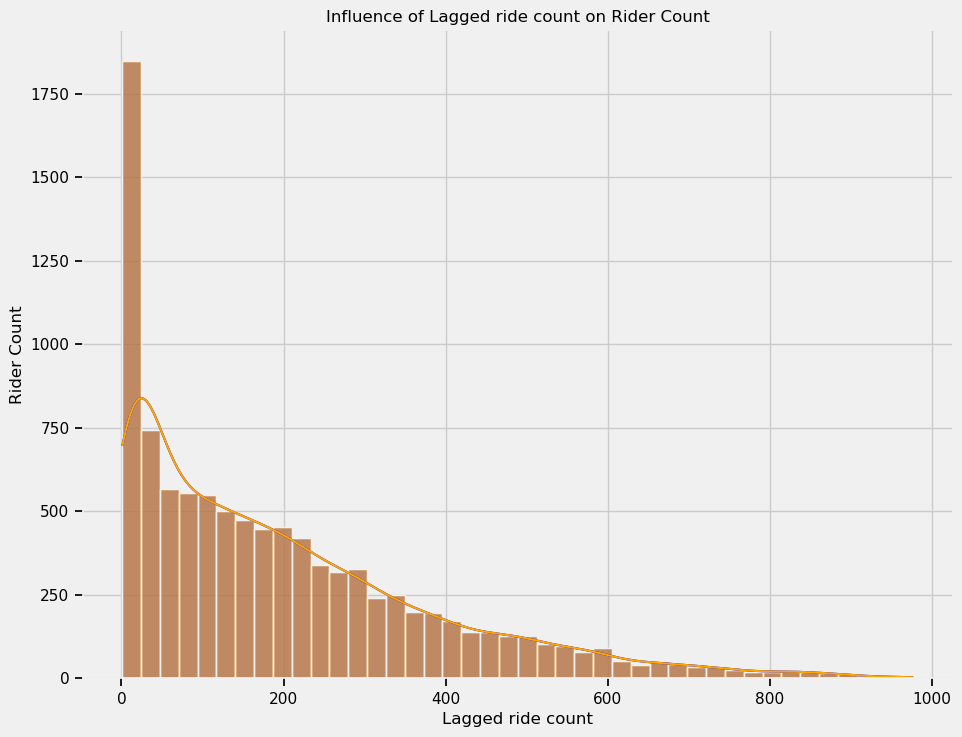

In [238]:
# plotting of a histogram to show the ridership trends between the lagged ride count (1 hour) and the rider count.
plt.figure(figsize=(10, 8))

sns.histplot(dataframe['Rider Count'], kde=True, color='blue', label='Rider Count', alpha=0.6)
sns.histplot(dataframe['Lagged ride count'], kde=True, color='orange', label='Lagged ride count', alpha=0.6)
plt.title('Influence of Lagged ride count on Rider Count')
plt.xlabel('Lagged ride count')
plt.ylabel('Rider Count')

# Display plot
plt.show()

In [240]:
# creating a column called 'Average Bike Speed'
dataframe['Average Bike Speed'] = dataframe['Average Trip Distance'] / dataframe['Average Trip Duration']
dataframe.head()

,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,...,Rider Count,datetimeUTC,date,hour,day,month,Week_end,Time_difference,Lagged ride count,Average Bike Speed
0,5ab8b269fd,1294444800,07/01/2011 19:00,Mist and broken clouds,0.5,51.0,11.0000,66.74,19.22,18,...,25.0,2011-01-08 00:00:00+00:00,2011-01-08 00:00:00+00:00,0,5,1,True,Night,NaN,0.493646
1,0eb353c11f,1294448400,07/01/2011 20:00,Mist,32.9,55.0,6.0000,19.30,-7.10,18,...,16.0,2011-01-08 01:00:00+00:00,2011-01-08 01:00:00+00:00,1,5,1,True,Night,25.0,0.183333
2,5811602d38,1294455600,07/01/2011 22:00,Light Snow,0.5,55.0,11.0000,66.74,-7.10,7,...,7.0,2011-01-08 03:00:00+00:00,2011-01-08 03:00:00+00:00,3,5,1,True,Night,16.0,0.603619
3,729d82e3b1,1294459200,07/01/2011 23:00,Light Rain,32.9,55.0,6.8351,19.30,-7.10,22,...,1.0,2011-01-08 04:00:00+00:00,2011-01-08 04:00:00+00:00,4,5,1,True,Night,7.0,0.381297
4,c7c27ecbc3,1294462800,08/01/2011 00:00,Mist,-0.5,74.0,6.8351,66.74,19.22,11,...,5.0,2011-01-08 05:00:00+00:00,2011-01-08 05:00:00+00:00,5,5,1,True,Night,1.0,1.109091


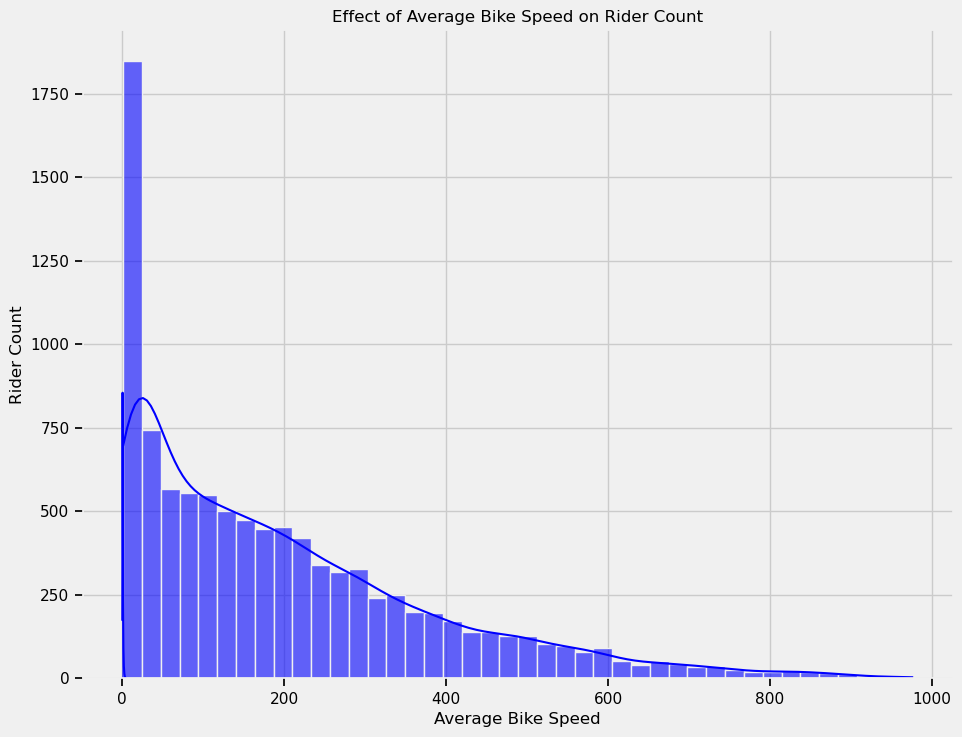

In [242]:
# plotting of a histogram to show the ridership trends between the Average bike speed and the riders count.
plt.figure(figsize=(10, 8))

sns.histplot(dataframe['Rider Count'], kde=True, color='blue', label='Rider Count', alpha=0.6)
sns.histplot(dataframe['Average Bike Speed'], kde=True, color='blue', label='Average Bike Speed', alpha=0.6)
plt.title('Effect of Average Bike Speed on Rider Count')
plt.xlabel('Average Bike Speed')
plt.ylabel('Rider Count')

# Display plot
plt.show()

In [243]:
# creating a column called 'percentage non e-bike rides'
dataframe['Percentage Non E-Bike Rides'] = 100 - dataframe['Percentage E-Bike Rides']
dataframe.head()

,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,...,datetimeUTC,date,hour,day,month,Week_end,Time_difference,Lagged ride count,Average Bike Speed,Percentage Non E-Bike Rides
0,5ab8b269fd,1294444800,07/01/2011 19:00,Mist and broken clouds,0.5,51.0,11.0000,66.74,19.22,18,...,2011-01-08 00:00:00+00:00,2011-01-08 00:00:00+00:00,0,5,1,True,Night,NaN,0.493646,84
1,0eb353c11f,1294448400,07/01/2011 20:00,Mist,32.9,55.0,6.0000,19.30,-7.10,18,...,2011-01-08 01:00:00+00:00,2011-01-08 01:00:00+00:00,1,5,1,True,Night,25.0,0.183333,93
2,5811602d38,1294455600,07/01/2011 22:00,Light Snow,0.5,55.0,11.0000,66.74,-7.10,7,...,2011-01-08 03:00:00+00:00,2011-01-08 03:00:00+00:00,3,5,1,True,Night,16.0,0.603619,73
3,729d82e3b1,1294459200,07/01/2011 23:00,Light Rain,32.9,55.0,6.8351,19.30,-7.10,22,...,2011-01-08 04:00:00+00:00,2011-01-08 04:00:00+00:00,4,5,1,True,Night,7.0,0.381297,90
4,c7c27ecbc3,1294462800,08/01/2011 00:00,Mist,-0.5,74.0,6.8351,66.74,19.22,11,...,2011-01-08 05:00:00+00:00,2011-01-08 05:00:00+00:00,5,5,1,True,Night,1.0,1.109091,96


In [246]:
test.shape

(7411, 23)

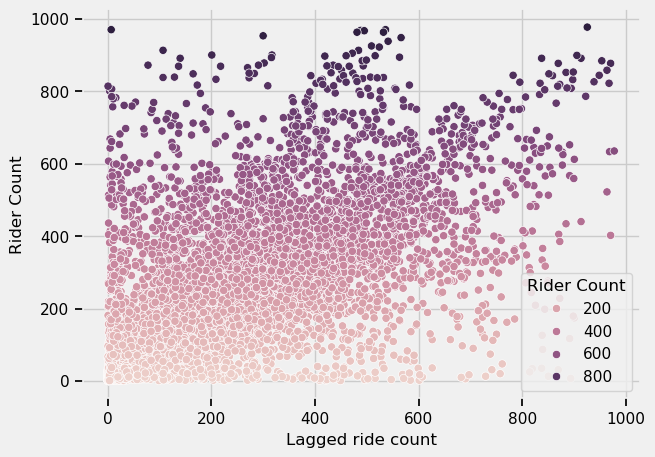

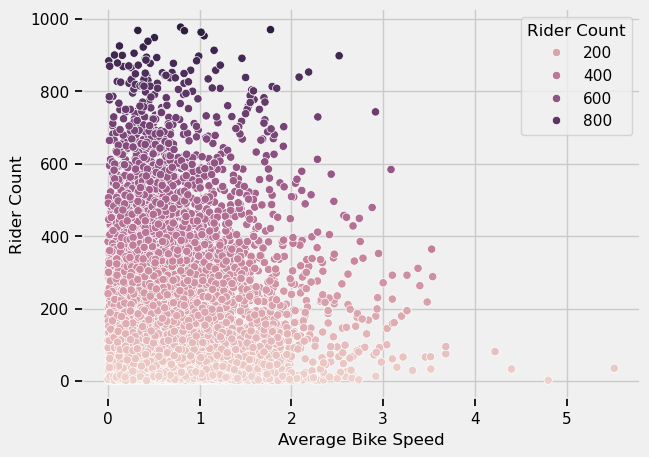

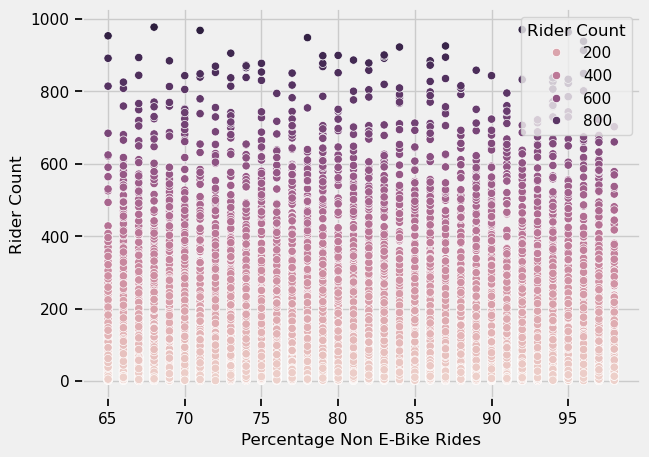

In [248]:
# plotting the scatterplots for the lagged ride count, average bike speed and poercentage non e-bike rides

def plot_scatter(df, x_var, y_var="Rider Count"):
    fig = sns.scatterplot(
        x=x_var,
        y=y_var,
        hue=y_var,
        data=df
    )
    # the axis labels are set based on input variables
    fig.set_xlabel(x_var)
    fig.set_ylabel(y_var)
    plt.show()

plot_scatter(dataframe, x_var="Lagged ride count")
plot_scatter(dataframe, x_var="Average Bike Speed")
plot_scatter(dataframe, x_var="Percentage Non E-Bike Rides")

In [249]:
# creating a column called 'Bike peak usage times'
dataframe['Bike peak usage times'] = dataframe['Percentage E-Bike Rides']
dataframe.head()

,unique_id,unix_time,Date/Time,Weather,Temperature,Humidity,Windspeed,Weekly High Temperature,Weekly Low Temperature,Average Trip Duration,...,date,hour,day,month,Week_end,Time_difference,Lagged ride count,Average Bike Speed,Percentage Non E-Bike Rides,Bike peak usage times
0,5ab8b269fd,1294444800,07/01/2011 19:00,Mist and broken clouds,0.5,51.0,11.0000,66.74,19.22,18,...,2011-01-08 00:00:00+00:00,0,5,1,True,Night,NaN,0.493646,84,16
1,0eb353c11f,1294448400,07/01/2011 20:00,Mist,32.9,55.0,6.0000,19.30,-7.10,18,...,2011-01-08 01:00:00+00:00,1,5,1,True,Night,25.0,0.183333,93,7
2,5811602d38,1294455600,07/01/2011 22:00,Light Snow,0.5,55.0,11.0000,66.74,-7.10,7,...,2011-01-08 03:00:00+00:00,3,5,1,True,Night,16.0,0.603619,73,27
3,729d82e3b1,1294459200,07/01/2011 23:00,Light Rain,32.9,55.0,6.8351,19.30,-7.10,22,...,2011-01-08 04:00:00+00:00,4,5,1,True,Night,7.0,0.381297,90,10
4,c7c27ecbc3,1294462800,08/01/2011 00:00,Mist,-0.5,74.0,6.8351,66.74,19.22,11,...,2011-01-08 05:00:00+00:00,5,5,1,True,Night,1.0,1.109091,96,4


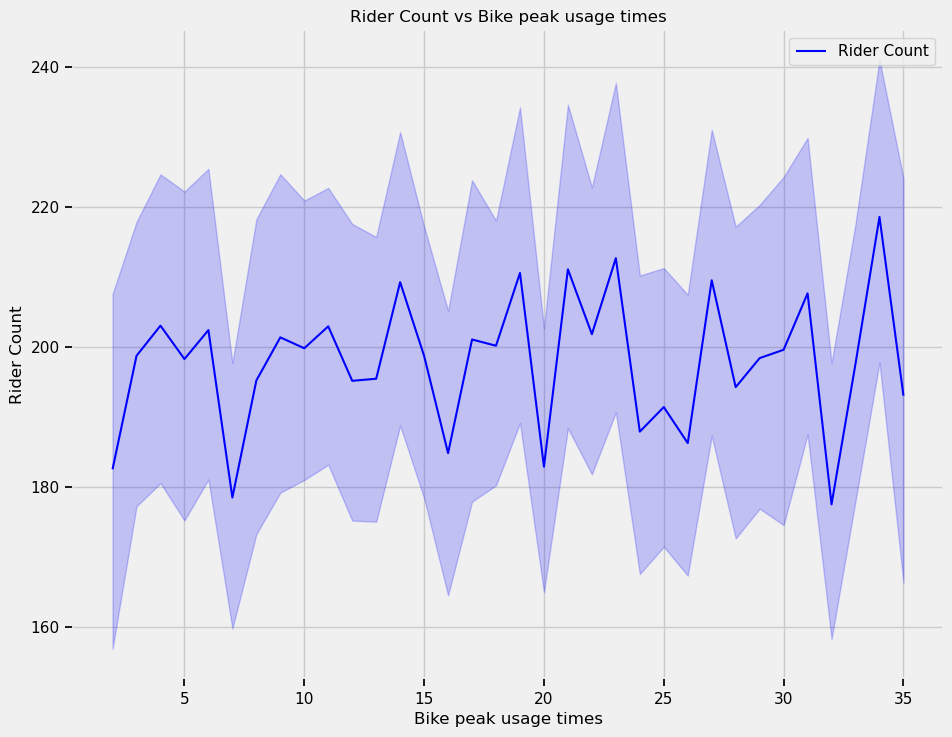

In [250]:
# plotting a lineplot of the rider count vs Bike peak usage times
plt.figure(figsize=(10, 8))

sns.lineplot(x=dataframe['Bike peak usage times'], y=dataframe['Rider Count'], color='blue', label='Rider Count')

plt.title('Rider Count vs Bike peak usage times')
plt.xlabel('Bike peak usage times')
plt.ylabel('Rider Count')
plt.legend() 

plt.show()

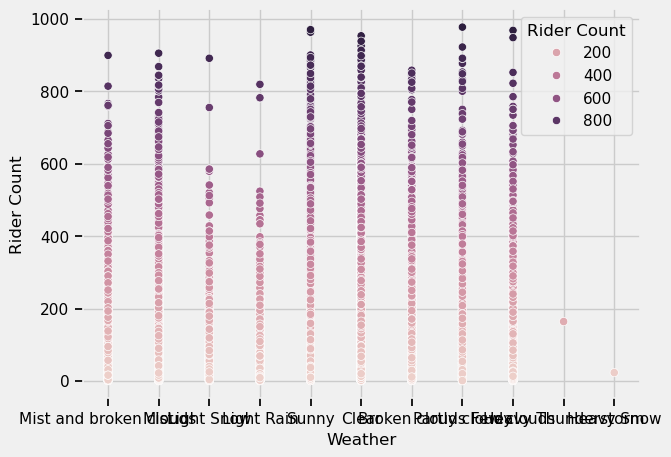

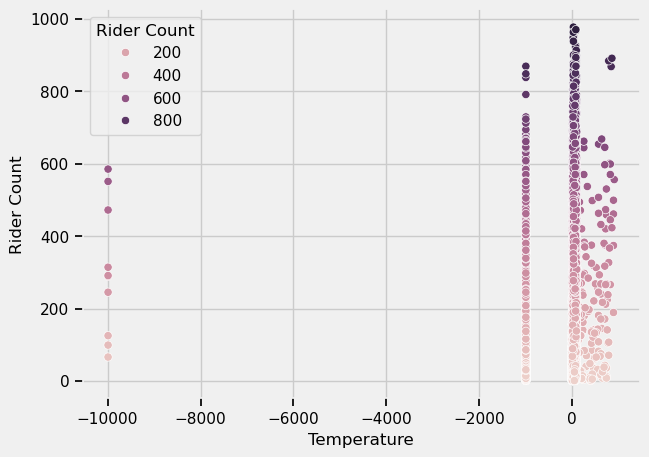

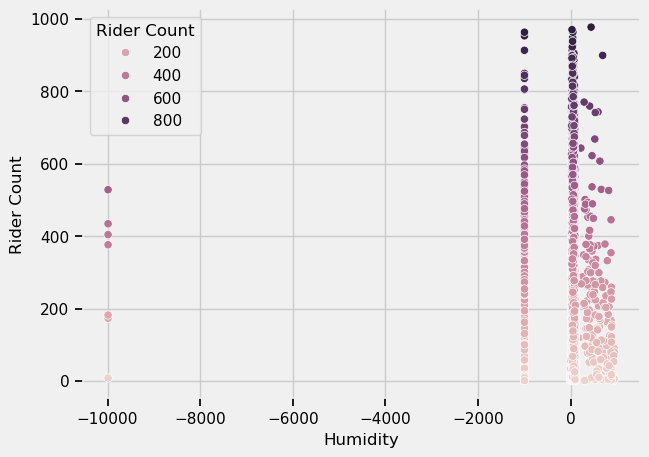

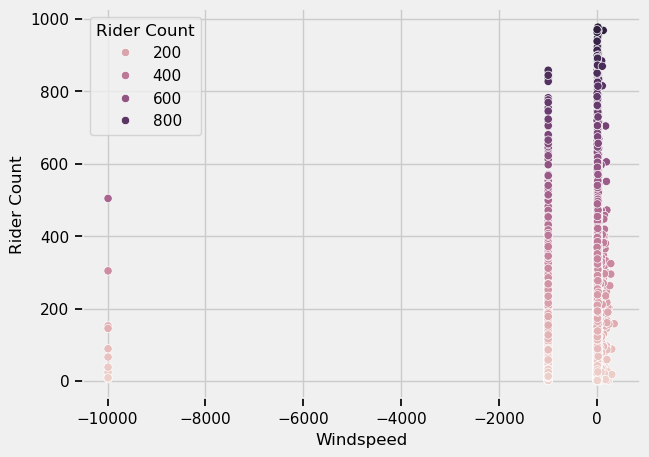

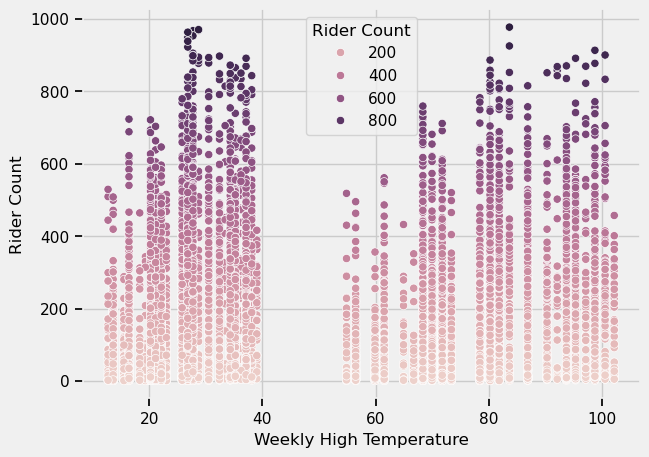

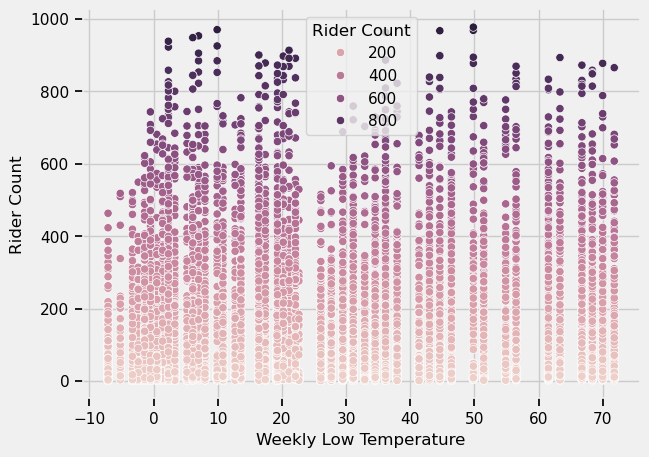

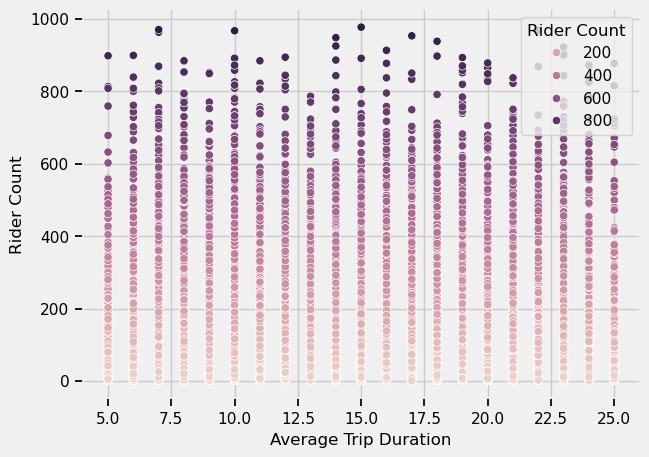

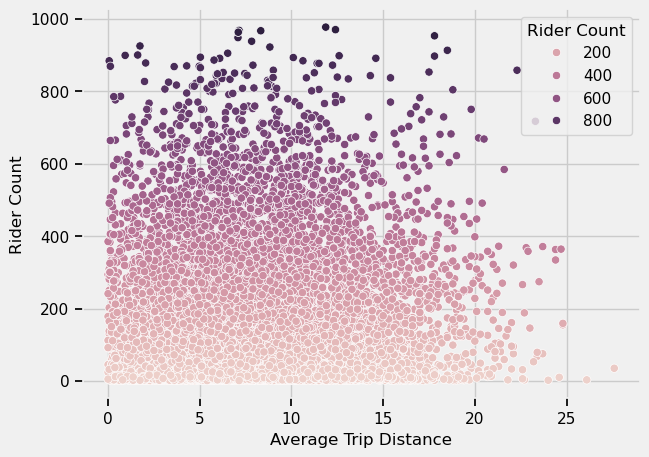

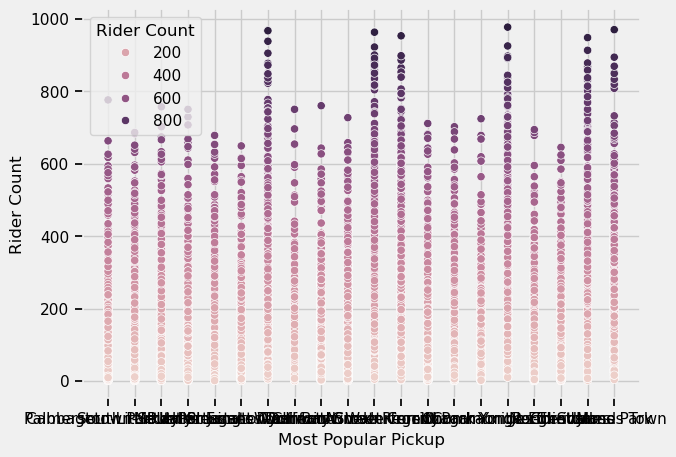

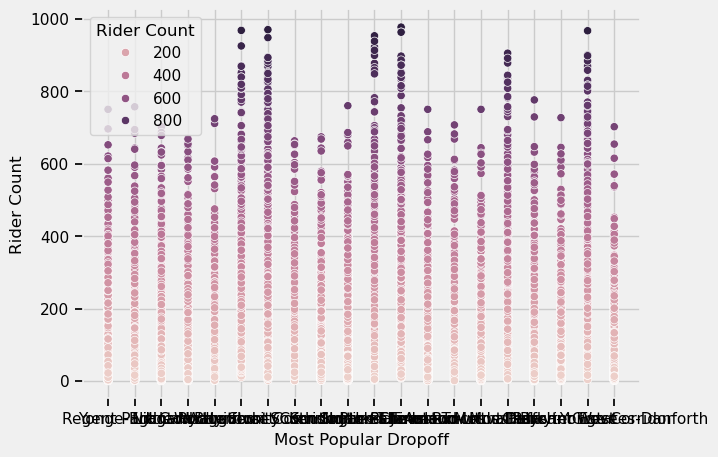

In [255]:
# I am using the seaborn and scatterplot function to create a scatterplot that will further explore the dataset and show the trends of the relationship between the rider count and each variable.
def plot_scatter(df, x_var, y_var="Rider Count"):
    fig = sns.scatterplot(
        x=x_var,
        y=y_var,
        hue=y_var,
        data=df
    )
    # the axis labels are set based on input variables
    fig.set_xlabel(x_var)
    fig.set_ylabel(y_var)
    plt.show()
    
# Set axis labels
plot_scatter(dataframe, x_var="Weather")
plot_scatter(dataframe, x_var="Temperature")
plot_scatter(dataframe, x_var="Humidity")
plot_scatter(dataframe, x_var="Windspeed")
plot_scatter(dataframe, x_var="Weekly High Temperature")
plot_scatter(dataframe, x_var="Weekly Low Temperature")
plot_scatter(dataframe, x_var="Average Trip Duration")
plot_scatter(dataframe, x_var="Average Trip Distance")
plot_scatter(dataframe, x_var="Most Popular Pickup")
plot_scatter(dataframe, x_var="Most Popular Dropoff")

# Feature Engineering
Once we've acquired a comprehensive understanding of the dataset, we can proceed with feature engineering.

Feature engineering is a pivotal stage in the machine learning process, as the quality and relevance of the features can exert a profound influence on the model's performance and its ability to provide accurate predictions or classifications. This endeavor combines the art of creativity, domain expertise, and the science of leveraging a deep comprehension of both the data and the specific problem at hand.

Feature engineering is one place your can set yourself apart from your classmates but for the purpose of creating a sample submission, I'll pick some of the simplest features to train the model on. Remember that for this competition, your model can use a maximum number of features specified in the contest documents!

In [258]:
test_size = test.shape[0]
test = dataframe[:test_size]

# Create the train set with the remaining rows
train = dataframe[test_size:]

In [260]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   unique_id                    7411 non-null   object             
 1   unix_time                    7411 non-null   int64              
 2   Date/Time                    7411 non-null   object             
 3   Weather                      7411 non-null   object             
 4   Temperature                  7411 non-null   float64            
 5   Humidity                     7411 non-null   float64            
 6   Windspeed                    7411 non-null   float64            
 7   Weekly High Temperature      7411 non-null   float64            
 8   Weekly Low Temperature       7411 non-null   float64            
 9   Average Trip Duration        7411 non-null   int64              
 10  Average Trip Distance        7411 non-null   flo

In [262]:
# Features

# This function is only an example, you need to make it more advanced
def feature_engineering(dataframe):
    
    feature_selected = ['Week_end', 'unix_time',
                        'Humidity',
                        'Percentage E-Bike Rides',
                        'hour', 'day', 'month', 'Average Bike Speed']

    selected_data = dataframe[feature_selected]
    
    return selected_data

train_cleaned = train.dropna()

X = feature_engineering(train_cleaned)

# Labels
y = train_cleaned['Rider Count']

# Split into train and val
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [264]:

train['Week_end'] = train['Week_end'].astype('int64')
test['Week_end'] = test['Week_end'].astype('int64')

In [266]:

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [268]:
X_test = X_test[X_train.columns]

In [270]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['Week_end', 'unix_time', 'Humidity', 'Percentage E-Bike Rides', 'hour',
       'day', 'month', 'Average Bike Speed'],
      dtype='object')
X_test columns: Index(['Week_end', 'unix_time', 'Humidity', 'Percentage E-Bike Rides', 'hour',
       'day', 'month', 'Average Bike Speed'],
      dtype='object')


In [272]:
# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 65.94
R² Score: 0.91


In [274]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                   Feature  Importance
4                     hour    0.616402
1                unix_time    0.191308
5                      day    0.069425
0                 Week_end    0.056757
2                 Humidity    0.032135
7       Average Bike Speed    0.013511
3  Percentage E-Bike Rides    0.010353
6                    month    0.010109


This is really not great performance, indicating there is A LOT of room for improvement. Let's take a look at some of the feature importances.


Top 10 Important Features:
                   Feature  Importance
4                     hour    0.616402
1                unix_time    0.191308
5                      day    0.069425
0                 Week_end    0.056757
2                 Humidity    0.032135
7       Average Bike Speed    0.013511
3  Percentage E-Bike Rides    0.010353
6                    month    0.010109


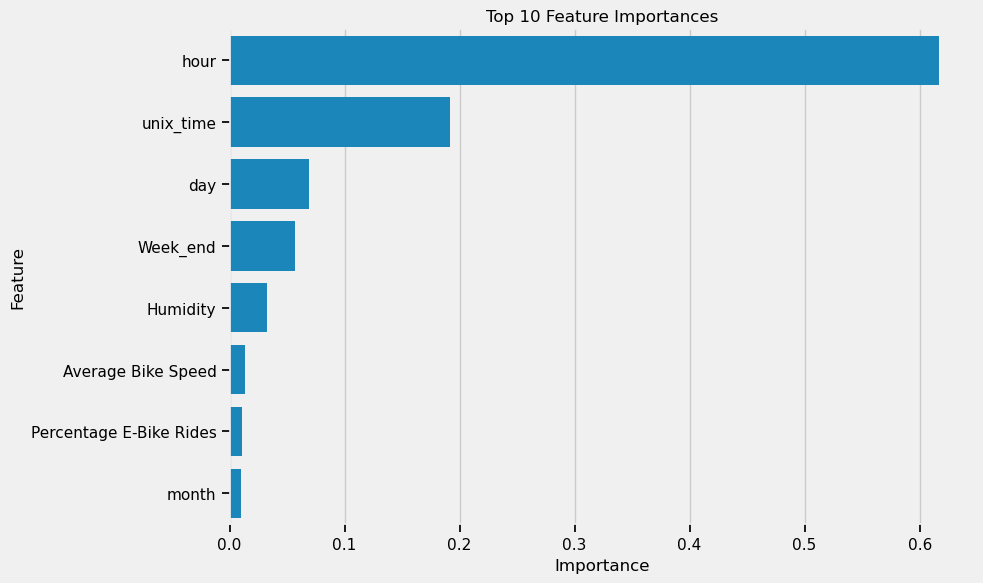

In [277]:
# Feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

We can see that the timestamp is a particularly important feature, so we may want to focus there for our feature engineering.

## Predict on the test dataset
Once you believe that the models have been effectively trained, you can proceed with making predictions on the test dataset and then submitting those for scoring on the Kaggle competition website.

First you have to run the same feature engineering steps on the test dataset as you did on the training dataset.

In [281]:
print("Training Features:", list(rf_model.feature_names_in_))
print("Test Features:", list(test.columns))

Training Features: ['Week_end', 'unix_time', 'Humidity', 'Percentage E-Bike Rides', 'hour', 'day', 'month', 'Average Bike Speed']
Test Features: ['unique_id', 'unix_time', 'Date/Time', 'Weather', 'Temperature', 'Humidity', 'Windspeed', 'Weekly High Temperature', 'Weekly Low Temperature', 'Average Trip Duration', 'Average Trip Distance', 'Most Popular Pickup', 'Most Popular Dropoff', 'Percentage E-Bike Rides', 'Station Maintenance Calls', 'units', 'Rider Count', 'datetimeUTC', 'date', 'hour', 'day', 'month', 'Week_end', 'Time_difference', 'Lagged ride count', 'Average Bike Speed', 'Percentage Non E-Bike Rides', 'Bike peak usage times']


In [283]:
# Feature engineering for test dataset
X_test = feature_engineering(test) 

In [285]:
rf_model.fit(X_train, y_train)
y_test = rf_model.predict(X_test)

Now we need to format the data in the format Kaggle wants.

In [288]:
submission = pd.DataFrame({'unique_id': test['unique_id'], 'Rider Count': y_test})
submission.head()

,unique_id,Rider Count
0,5ab8b269fd,129.349722
1,0eb353c11f,146.002403
2,5811602d38,13.527018
3,729d82e3b1,13.049886
4,c7c27ecbc3,11.975547
